In [215]:
# 1️⃣ Loading and Understanding the Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
# Load the dataset
df =pd.read_csv ("marketing_and_product_performance.csv")

In [217]:
# Display first 5 rows
df.head()  # Shows first 5 rows to get an overview of data

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [218]:
# Check data types and missing values
df.info()  # Shows column data types, non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Campaign_ID                        10000 non-null  object 
 1   Product_ID                         10000 non-null  object 
 2   Budget                             10000 non-null  float64
 3   Clicks                             10000 non-null  int64  
 4   Conversions                        10000 non-null  int64  
 5   Revenue_Generated                  10000 non-null  float64
 6   ROI                                10000 non-null  float64
 7   Customer_ID                        10000 non-null  object 
 8   Subscription_Tier                  10000 non-null  object 
 9   Subscription_Length                10000 non-null  int64  
 10  Flash_Sale_ID                      10000 non-null  object 
 11  Discount_Level                     10000 non-null  int6

In [219]:
# Summary statistics of numerical columns
df.describe()  # Gives count, mean, std, min, max, etc.

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000


In [220]:
# Check missing values
df.isnull().sum()  # Shows total missing values per column

Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64

In [221]:
# Convert Subscription_Tier column to numeric: Basic=1, Standard=2, Premium=3
df['Subscription_Tier'] = df['Subscription_Tier'].map({'Basic': 1, 'Standard': 2, 'Premium':3})

In [222]:
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,3,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,3,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,1,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,3,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,2,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [223]:
# Convert Product_ID to categorical
df['Product_ID'] = df['Product_ID'].astype('category')
df

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,3,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,3,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,1,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,3,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,2,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CMP_U1BQY9,PROD_F204EM,49183.07,25,720,95399.69,4.61,CUST_K3F0GA,3,18,FLASH_WOTOXI,25,95,BNDL_6DN251,196.59,3,Affordable
9996,CMP_ZQDI7T,PROD_5313XR,38519.59,3503,799,38999.04,3.31,CUST_SY9H51,2,18,FLASH_3HIKX0,10,5,BNDL_24U1RG,461.12,2,Durable
9997,CMP_SYFTKH,PROD_44T74P,21532.92,1140,428,39646.56,5.00,CUST_C6LMF4,2,19,FLASH_W3KMY9,37,191,BNDL_MIA2QO,248.20,3,Stylish
9998,CMP_FTAW8H,PROD_CPN4QT,35546.54,1078,409,6785.63,4.08,CUST_URFVAQ,1,31,FLASH_L4UDXZ,59,73,BNDL_PHIE38,217.78,4,Affordable


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Campaign_ID                        10000 non-null  object  
 1   Product_ID                         10000 non-null  category
 2   Budget                             10000 non-null  float64 
 3   Clicks                             10000 non-null  int64   
 4   Conversions                        10000 non-null  int64   
 5   Revenue_Generated                  10000 non-null  float64 
 6   ROI                                10000 non-null  float64 
 7   Customer_ID                        10000 non-null  object  
 8   Subscription_Tier                  10000 non-null  int64   
 9   Subscription_Length                10000 non-null  int64   
 10  Flash_Sale_ID                      10000 non-null  object  
 11  Discount_Level                     10000 n

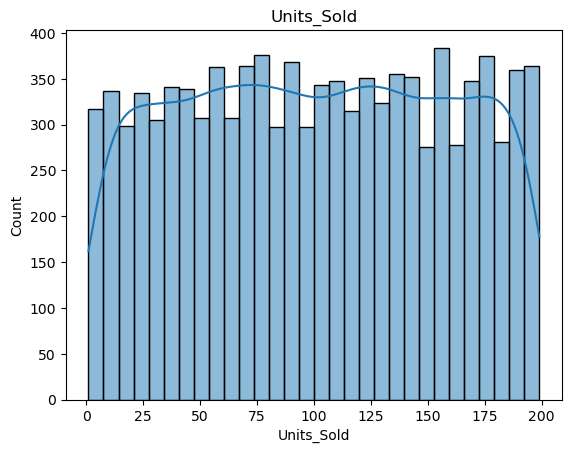

In [225]:
# Histogram for Units_Sold
sns.histplot(df['Units_Sold'], bins=30, kde=True)
plt.title("Units_Sold")
plt.show()

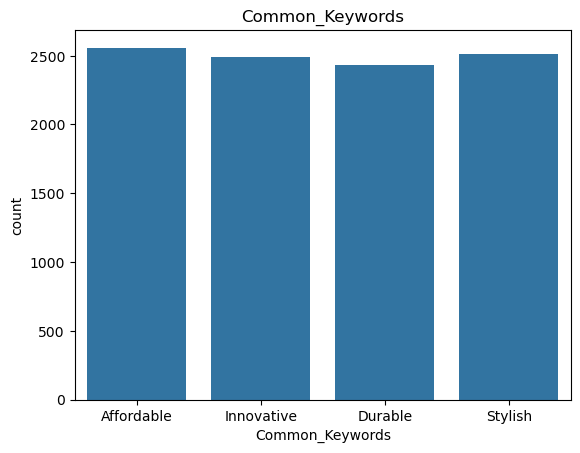

In [226]:
# Bar plot for Common_Keywords
sns.countplot(x='Common_Keywords', data=df)
plt.title("Common_Keywords")
plt.show()

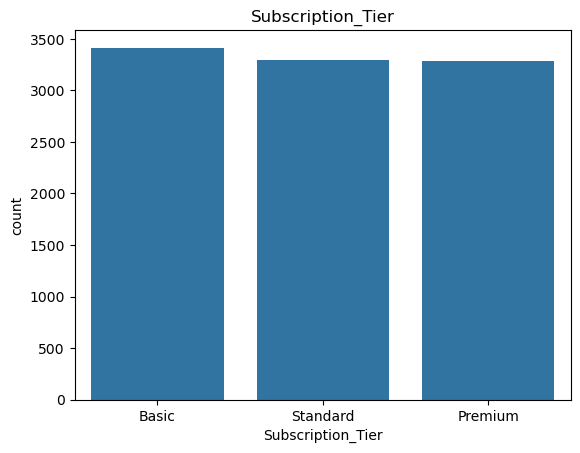

In [227]:
#Countplot for Subscription_Tier
data = df.copy()
sns.countplot(x='Subscription_Tier', data=data)
plt.title("Subscription_Tier")
plt.xticks([0, 1, 2], ['Basic', 'Standard', 'Premium'])
plt.show()

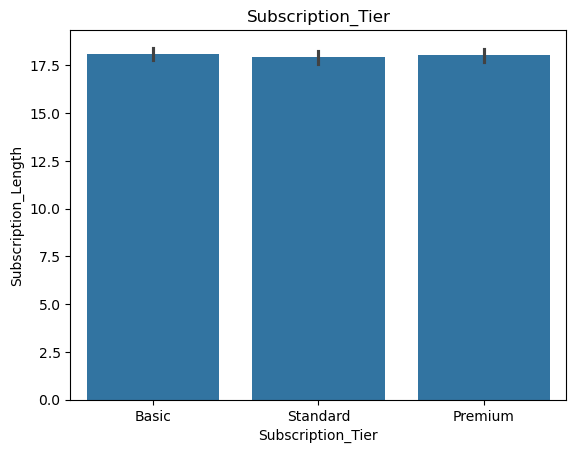

In [228]:
# Subscription_length by Subscription_Tier
sns.barplot(x='Subscription_Tier', y='Subscription_Length', data=df)
plt.title("Subscription_Tier")
plt.xticks([0, 1, 2], ['Basic', 'Standard', 'Premium'])
plt.show()

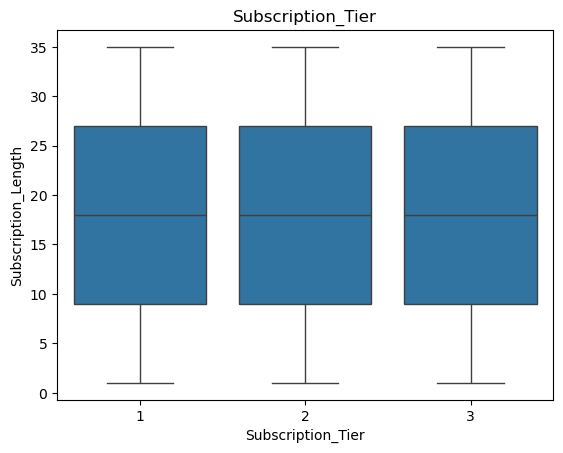

In [229]:
# Boxplot of Subscription_Tier
sns.boxplot(x='Subscription_Tier', y='Subscription_Length', data=df)
plt.title("Subscription_Tier")
plt.show()

        Budget  Clicks  Conversions  Revenue_Generated   ROI  \
0     41770.45    4946           73           15520.09  1.94   
1     29900.93     570          510           30866.17  0.76   
2     22367.45    3546          265           32585.62  1.41   
3     29957.54    2573          781           95740.12  3.32   
4     36277.19     818           79           81990.43  3.53   
...        ...     ...          ...                ...   ...   
9995  49183.07      25          720           95399.69  4.61   
9996  38519.59    3503          799           38999.04  3.31   
9997  21532.92    1140          428           39646.56  5.00   
9998  35546.54    1078          409            6785.63  4.08   
9999   7179.69    1682          935           96707.63  1.74   

      Subscription_Tier  Subscription_Length  Discount_Level  Units_Sold  \
0                     3                    4              43          34   
1                     3                    4              28          97   
2  

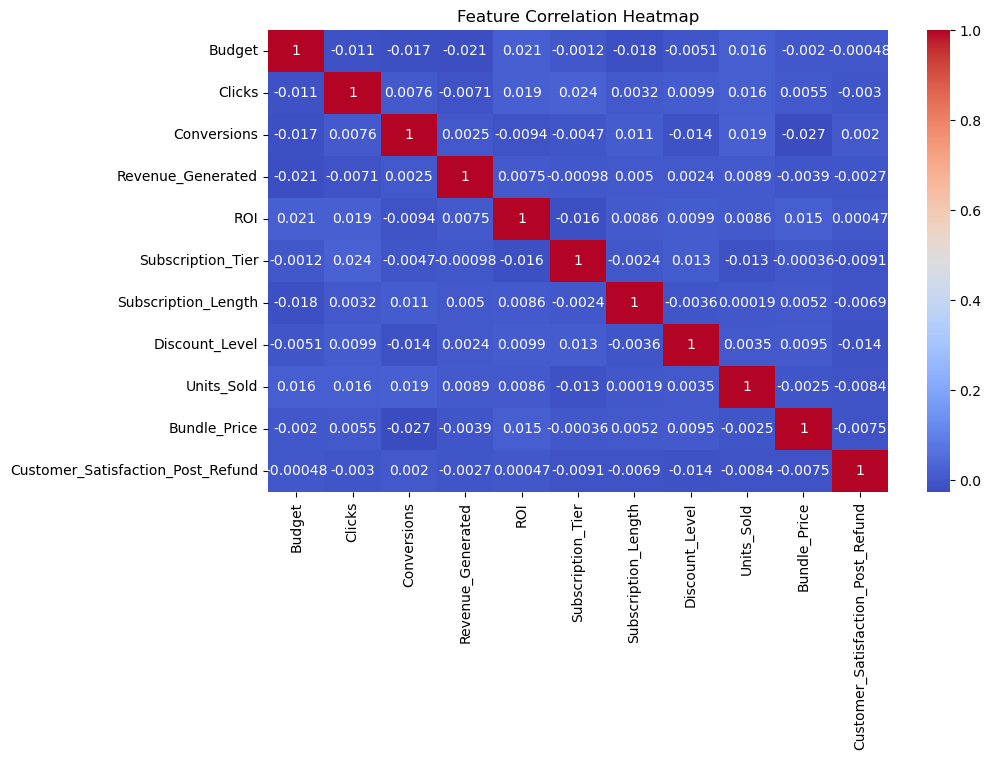

In [230]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df)
# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [231]:
#Feature Engineering
# Create Revenue_Generated Feature
df['Revenue_strategy'] = df['Clicks'] + df['Conversions']
df

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,Revenue_strategy
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,3,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable,5019
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,3,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative,1080
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,1,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable,3811
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,3,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable,3354
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,2,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable,897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CMP_U1BQY9,PROD_F204EM,49183.07,25,720,95399.69,4.61,CUST_K3F0GA,3,18,FLASH_WOTOXI,25,95,BNDL_6DN251,196.59,3,Affordable,745
9996,CMP_ZQDI7T,PROD_5313XR,38519.59,3503,799,38999.04,3.31,CUST_SY9H51,2,18,FLASH_3HIKX0,10,5,BNDL_24U1RG,461.12,2,Durable,4302
9997,CMP_SYFTKH,PROD_44T74P,21532.92,1140,428,39646.56,5.00,CUST_C6LMF4,2,19,FLASH_W3KMY9,37,191,BNDL_MIA2QO,248.20,3,Stylish,1568
9998,CMP_FTAW8H,PROD_CPN4QT,35546.54,1078,409,6785.63,4.08,CUST_URFVAQ,1,31,FLASH_L4UDXZ,59,73,BNDL_PHIE38,217.78,4,Affordable,1487


In [232]:
# Create categorical features by binning numerical columns (Revenue)
bins = [df['Revenue_Generated'].min(), df['Revenue_Generated'].quantile(0.25), df['Revenue_Generated'].quantile(0.5), df['Revenue_Generated'].quantile(0.75), df['Revenue_Generated'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Revenue_Category'] = pd.cut(df['Revenue_Generated'], bins=bins, labels=labels, include_lowest=True)
print("\nRevenue Category Distribution:")
print(df['Revenue_Category'].value_counts())



Revenue Category Distribution:
Revenue_Category
Low          2500
Medium       2500
High         2500
Very High    2500
Name: count, dtype: int64


In [233]:
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,Revenue_strategy,Revenue_Category
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,3,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable,5019,Low
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,3,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative,1080,Medium
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,1,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable,3811,Medium
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,3,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable,3354,Very High
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,2,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable,897,Very High


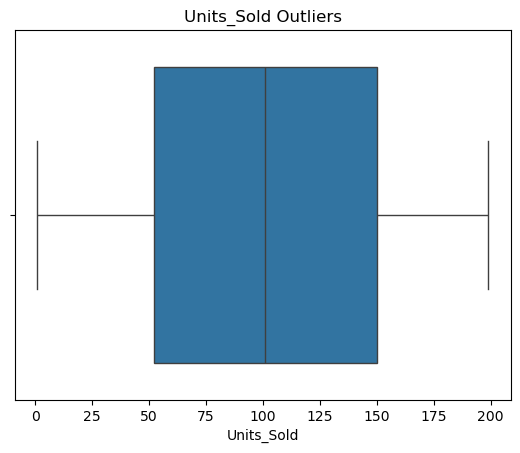

In [234]:
# Outlier Detection
# Boxplot for Units_Sold
sns.boxplot(x=df['Units_Sold'])
plt.title("Units_Sold Outliers")
plt.show()

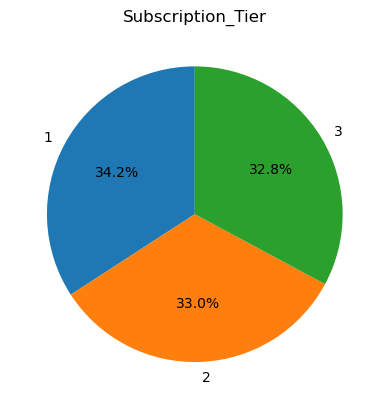

In [235]:
# Pie Chart for Customer_Satisfaction_Post_Refund
Subscription_Tier = df['Subscription_Tier'].value_counts()
plt.pie(Subscription_Tier,labels=Subscription_Tier.index, autopct='%1.1f%%', startangle=90)
plt.title("Subscription_Tier")
plt.show()

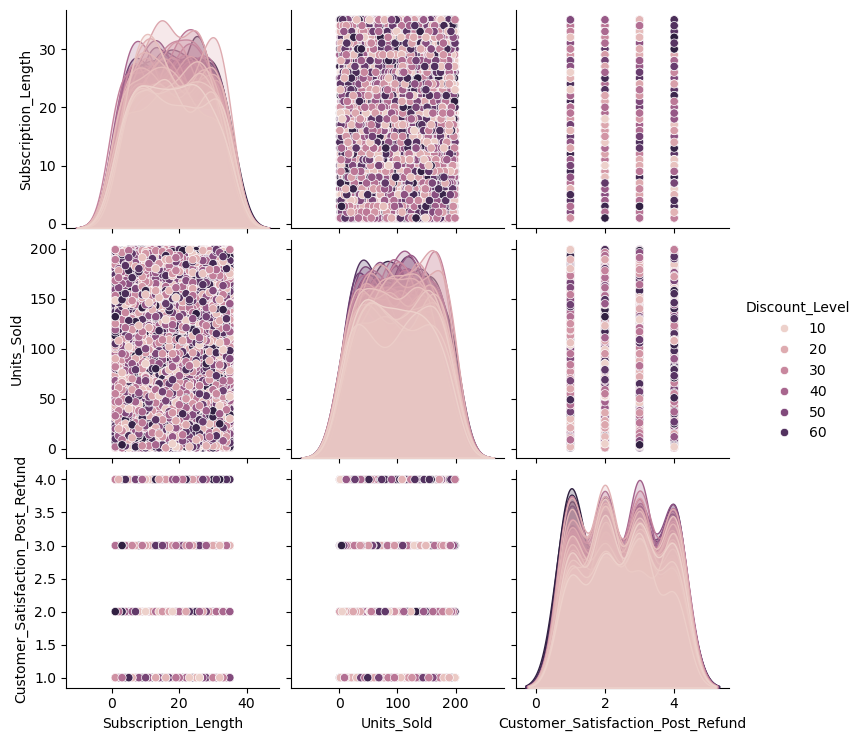

In [236]:
# Pairplot for numerical features
sns.pairplot(df[['Subscription_Length', 'Discount_Level', 'Units_Sold','Customer_Satisfaction_Post_Refund']], hue='Discount_Level')
plt.show()

In [237]:
# One-hot encode Subscription_Tier
df = pd.get_dummies(df, columns=['Subscription_Tier'], drop_first=True)

In [238]:
df

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,Revenue_strategy,Revenue_Category,Subscription_Tier_2,Subscription_Tier_3
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable,5019,Low,False,True
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative,1080,Medium,False,True
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable,3811,Medium,False,False
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable,3354,Very High,False,True
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable,897,Very High,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CMP_U1BQY9,PROD_F204EM,49183.07,25,720,95399.69,4.61,CUST_K3F0GA,18,FLASH_WOTOXI,25,95,BNDL_6DN251,196.59,3,Affordable,745,Very High,False,True
9996,CMP_ZQDI7T,PROD_5313XR,38519.59,3503,799,38999.04,3.31,CUST_SY9H51,18,FLASH_3HIKX0,10,5,BNDL_24U1RG,461.12,2,Durable,4302,Medium,True,False
9997,CMP_SYFTKH,PROD_44T74P,21532.92,1140,428,39646.56,5.00,CUST_C6LMF4,19,FLASH_W3KMY9,37,191,BNDL_MIA2QO,248.20,3,Stylish,1568,Medium,True,False
9998,CMP_FTAW8H,PROD_CPN4QT,35546.54,1078,409,6785.63,4.08,CUST_URFVAQ,31,FLASH_L4UDXZ,59,73,BNDL_PHIE38,217.78,4,Affordable,1487,Low,False,False
